# INTELIGENCIA ARTIFICIAL (1INF24\)
Dr. Edwin Villanueva Talavera (ervillanueva@pucp.edu.pe)



# <font color=blue>Preprocesamiento de datos: Caso de Estudio</font>

---

## Entendimiento del negocio

El sector de telefonia movil esta saturado de compañias operadoras, lo cual  dificulta la captura de nuevos clientes. Las compañias tienen el constante desafío de diseñar campañas para disminuir la **tasa de abandono de sus clientes** (conocido como ***churn***). Esta tasa de abandono puede ser definida como el cociente de la *cantidad de clientes que se pierden en un periodo* entre la *cantidad de clientes en un punto en el tiempo* que sirve de referencia. Por ejemplo: si al inicio de un mes se tuvieran 100 clientes y durante el mes se pierden 5, la tasa de abandono sería del 5%.

La compañia de Telefonia X lo ha contrado a Usted como cientifico de datos y le ha encargado la tarea de construir un modelo de predicción de abandono de cliente a fin de poder hacer acciones de retencion antes de que el cliente se vaya. Para ello la compañia le ha disponibilizado los siguientes archivos de datos (considere que cada registro corresponde a una linea de un cliente):

1.   <font color=blue>Clientes_general.csv</font>: Tabla con informacion general de clientes.
2.   <font color=blue>Clientes_detalle.csv</font>: Tabla con información de comportamiento de los clientes e información de Churn

**En este cuaderno se le pide realizar un análisis exploratorio y limpieza de los datos con el fin de obtener un dataset limpio y usable para entrenar los modelos de machine learning**



## Diccionario de datos

**Clientes_general.csv** tiene los siguientes campos:

*   Client_ID: identificador único del cliente.
*   Género: (M) para masculino, (F) para femenino.
*   Edad: edad (años cumplidos) del cliente.
*   NSE: nivel socioecónomico del cliente.
*   Estado civil: (S) soltero, (C) casado, (V) viudo.
*   Departamento: lugar de residencia declarada por el cliente.

**Clientes_detalle.csv** tiene los siguientes campos:

*   Client_ID: identificador único del cliente.
*   Renta: renta básica del plan.
*   Uso_SMS: número de SMS enviados en el mes.
*   Deuda_Ant: deuda facturada en el mes anterior.
*   Min_callcenter: minutos de llamadas al centro de atención.
*   Antiguedad: antiguedad del cliente (en meses).
*   Uso_MB: total de MB consumidos en el periodo.
*   Deuda_Act: deuda facturada en el mes.
*   Uso_APP: MB consumidas en el APP de la operadora.
*   Min_Ent_3M: cantidad de llamadas recibidas por el cliente en los últimos 3 meses.
*   Min_Sal_3M: cantidad de llamadas realizadas por el cliente en los últimos 3 meses.
*   Churn: 0, si la línea ya no se encuentra activa al cierre (el cliente se fué), 1 si cierra en estado suspendida y 2 si cierra en estado activo

## Cargando datos

In [42]:
import pandas as pd

# Importamos la información de la tabla Maestro Clientes.
df_contaminantes = pd.read_csv('estaciones_filtradas.csv', sep = ',')
print('Se leyo un dataset de dimensiones {}'.format(df_contaminantes.shape))
df_contaminantes.head()

Se leyo un dataset de dimensiones (98568, 11)


,ESTACION,ANO,MES,DIA,HORA,PM 10,PM 2.5,SO2,NO2,O3,CO
0,ATE,2017,1,1,0,421.9,NaN,54.7,NaN,1.9,885.5
1,ATE,2017,1,1,1,382.9,NaN,53.5,NaN,1.7,1046.5
2,ATE,2017,1,1,2,403.4,NaN,54.2,NaN,2.1,1342.0
3,ATE,2017,1,1,3,425.0,NaN,52.0,NaN,2.4,1431.8
4,ATE,2017,1,1,4,289.3,NaN,47.9,NaN,1.4,1138.5


## Verificando los tipos de datos de las columnas y haciendo correcciones si necesario
Revisamos que los tipos de datos sean los esperados, sino los corregimos

In [43]:
df_contaminantes.dtypes

,0
ESTACION,object
ANO,int64
MES,int64
DIA,int64
HORA,int64
PM 10,float64
PM 2.5,float64
SO2,float64
NO2,float64
O3,float64


## Lidiando con nulos y dropeando columnas que no sean de utilidad  

Buscamos los valores nulos. Los mostramos en porcentaje del total de información.

In [44]:
df_contaminantes.columns

Index(['ESTACION', 'ANO', 'MES', 'DIA', 'HORA', 'PM 10', 'PM 2.5', 'SO2',
       'NO2', 'O3', 'CO'],
      dtype='object')

In [ ]:
# Muestrame valores que tengan un mismo mes ,ano y distrito

In [45]:
filtro = (df_contaminantes['ANO']==2019) & (df_contaminantes['MES']==2) & (df_contaminantes['ESTACION'] == "ATE")
df_filtrado = df_contaminantes[filtro]
print(df_filtrado)

      ESTACION   ANO  MES  DIA  HORA   PM 10  PM 2.5   SO2  NO2   O3      CO
18264      ATE  2019    2    1     0   40.61     NaN  14.7  NaN  5.6  2004.4
18265      ATE  2019    2    1     1  109.40     NaN  11.1  NaN  6.0  2137.8
18266      ATE  2019    2    1     2   82.90     NaN   7.4  NaN  5.5  1897.5
18267      ATE  2019    2    1     3   58.84     NaN   6.7  NaN  5.1  1808.9
18268      ATE  2019    2    1     4   37.84     NaN   6.5  NaN  5.1  1784.8
...        ...   ...  ...  ...   ...     ...     ...   ...  ...  ...     ...
18931      ATE  2019    2   28    19     NaN     NaN   NaN  NaN  5.9  1867.6
18932      ATE  2019    2   28    20     NaN     NaN   NaN  NaN  5.6  1934.3
18933      ATE  2019    2   28    21     NaN     NaN   NaN  NaN  5.7  2018.2
18934      ATE  2019    2   28    22     NaN     NaN   NaN  NaN  5.9  2250.5
18935      ATE  2019    2   28    23     NaN     NaN   NaN  NaN  5.9  2470.2

[672 rows x 11 columns]


In [46]:
df_contaminantes.shape[0]

98568

In [47]:
100*df_contaminantes.isnull().sum() / df_contaminantes.shape[0]

,0
ESTACION,0.000000
ANO,0.000000
MES,0.000000
DIA,0.000000
HORA,0.000000
PM 10,36.538227
PM 2.5,48.188053
SO2,55.937018
NO2,44.628074
O3,37.808417


In [48]:
# Observo que hay muchas filas las cuales tienen hasta 4 columnas o mas con valores NaN , entonces eliminare los registros que contengan mas de 4 columnas de
# contaminantes en cero



# Lista de columnas de contaminantes (ajusta el nombre de las columnas según tu dataset)
columnas_contaminantes = ['PM 10', 'PM 2.5', 'SO2', 'NO2', 'O3', 'CO']

# Crear una máscara que cuente cuántas columnas tienen valores cero en cada fila
mask = df_contaminantes[columnas_contaminantes].isna().sum(axis=1) > 4

# Filtrar el DataFrame, eliminando las filas donde más de 4 columnas tienen valor cero
df_contaminantes = df_contaminantes[~mask]

# Ver el resultado
print(df_contaminantes)




                     ESTACION   ANO  MES  DIA  HORA  PM 10  PM 2.5   SO2  NO2  \
0                         ATE  2017    1    1     0  421.9     NaN  54.7  NaN   
1                         ATE  2017    1    1     1  382.9     NaN  53.5  NaN   
2                         ATE  2017    1    1     2  403.4     NaN  54.2  NaN   
3                         ATE  2017    1    1     3  425.0     NaN  52.0  NaN   
4                         ATE  2017    1    1     4  289.3     NaN  47.9  NaN   
...                       ...   ...  ...  ...   ...    ...     ...   ...  ...   
98563  SAN JUAN DE LURIGANCHO  2020    9   30    19    NaN   15.03   NaN  NaN   
98564  SAN JUAN DE LURIGANCHO  2020    9   30    20    NaN   13.33   NaN  NaN   
98565  SAN JUAN DE LURIGANCHO  2020    9   30    21    NaN   20.49   NaN  NaN   
98566  SAN JUAN DE LURIGANCHO  2020    9   30    22    NaN   24.55   NaN  NaN   
98567  SAN JUAN DE LURIGANCHO  2020    9   30    23    NaN   17.77   NaN  NaN   

        O3      CO  
0     

In [ ]:
# Para realizar el imputador antes debo pasar las columnas a numericas, en este caso la estacion lo pasare a numerica
# aplicare el one-hot-encoder

In [49]:
df_contaminantes['ESTACION'].unique()

array(['ATE', 'SANTA ANITA', 'SAN JUAN DE LURIGANCHO'], dtype=object)

In [50]:
# Creamos 4 variables binarias (Norte, Sur, Centro y Lima) en base a la ubicacion del DEPARTAMENTO.
# Esta codificacion se llama one-hot encoding y es util para convertir categorias en valores numericos
df_contaminantes['ATE'] = np.where(df_contaminantes.ESTACION == 'ATE', 1, 0)
df_contaminantes['SANTA ANITA'] = np.where(df_contaminantes.ESTACION == 'SANTA ANITA', 1, 0)
df_contaminantes['SAN JUAN DE LURIGANCHO'] = np.where(df_contaminantes.ESTACION == 'SAN JUAN DE LURIGANCHO', 1, 0)


In [51]:
#Verifico que se agregaron las columnas
df_contaminantes.head()

,ESTACION,ANO,MES,DIA,HORA,PM 10,PM 2.5,SO2,NO2,O3,CO,ATE,SANTA ANITA,SAN JUAN DE LURIGANCHO
0,ATE,2017,1,1,0,421.9,NaN,54.7,NaN,1.9,885.5,1,0,0
1,ATE,2017,1,1,1,382.9,NaN,53.5,NaN,1.7,1046.5,1,0,0
2,ATE,2017,1,1,2,403.4,NaN,54.2,NaN,2.1,1342.0,1,0,0
3,ATE,2017,1,1,3,425.0,NaN,52.0,NaN,2.4,1431.8,1,0,0
4,ATE,2017,1,1,4,289.3,NaN,47.9,NaN,1.4,1138.5,1,0,0


In [52]:
#Borro la columna ESTACION
df_contaminantes = df_contaminantes.drop(columns = ['ESTACION'])

In [58]:
df_contaminantes.head()

,ANO,MES,DIA,HORA,PM 10,PM 2.5,SO2,NO2,O3,CO,ATE,SANTA ANITA,SAN JUAN DE LURIGANCHO
0,2017,1,1,0,421.9,NaN,54.7,NaN,1.9,885.5,1,0,0
1,2017,1,1,1,382.9,NaN,53.5,NaN,1.7,1046.5,1,0,0
2,2017,1,1,2,403.4,NaN,54.2,NaN,2.1,1342.0,1,0,0
3,2017,1,1,3,425.0,NaN,52.0,NaN,2.4,1431.8,1,0,0
4,2017,1,1,4,289.3,NaN,47.9,NaN,1.4,1138.5,1,0,0


In [53]:
#Librerias necesarias  para imputar datos por datos nulos

import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [56]:
df_contaminantes.shape

(76739, 13)

In [59]:
100*df_contaminantes.isnull().sum() / df_contaminantes.shape[0]

,0
ANO,0.000000
MES,0.000000
DIA,0.000000
HORA,0.000000
PM 10,21.195220
PM 2.5,34.175582
SO2,43.414691
NO2,29.047811
O3,20.129269
CO,29.278463


In [61]:
# hare una tecnica de imputador de valores

imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=20, random_state=42),
    max_iter=5,  # Número de iteraciones para la imputación
    random_state=42
)

# Aplicar imputación
df_imputed = imputer.fit_transform(df_contaminantes)

# Convertir a DataFrame para visualizar el resultado
df_imputed = pd.DataFrame(df_imputed, columns=df_contaminantes.columns)

print("\nDatos imputados:")
print(df_imputed)



Datos imputados:
          ANO  MES   DIA  HORA     PM 10   PM 2.5     SO2     NO2   O3  \
0      2017.0  1.0   1.0   0.0  421.9000  263.255  54.700  33.765  1.9   
1      2017.0  1.0   1.0   1.0  382.9000  273.140  53.500  33.255  1.7   
2      2017.0  1.0   1.0   2.0  403.4000  266.390  54.200  41.500  2.1   
3      2017.0  1.0   1.0   3.0  425.0000  275.795  52.000  38.005  2.4   
4      2017.0  1.0   1.0   4.0  289.3000  165.980  47.900  30.385  1.4   
...       ...  ...   ...   ...       ...      ...     ...     ...  ...   
76734  2020.0  9.0  30.0  19.0   44.1580   15.030  23.215  13.590  3.5   
76735  2020.0  9.0  30.0  20.0   29.3835   13.330  23.420  17.640  3.6   
76736  2020.0  9.0  30.0  21.0   56.3060   20.490  23.355  19.965  3.5   
76737  2020.0  9.0  30.0  22.0   66.1815   24.550  23.680  22.150  3.7   
76738  2020.0  9.0  30.0  23.0   56.5015   17.770  23.430  12.265  3.6   

           CO  ATE  SANTA ANITA  SAN JUAN DE LURIGANCHO  
0       885.5  1.0          0.0    

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Vemos que ya no hay nulos en nuestro dataset

In [63]:
# Verificamos en df_imputed
100*df_imputed.isnull().sum() / df_imputed.shape[0]

,0
ANO,0.0
MES,0.0
DIA,0.0
HORA,0.0
PM 10,0.0
PM 2.5,0.0
SO2,0.0
NO2,0.0
O3,0.0
CO,0.0


## Corrección de valores inconsistentes y outliers

Buscamos inconsistencias en las variables. Para ello, mostramos los descriptivos estadísticos

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EDAD,4947.0,40.475035,20.177957,5.000000,27.500000,40.000000,53.000000,999.000000
NSE,4947.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CAPDEUDA,4947.0,50.003427,0.995718,46.080974,49.342661,50.011050,50.676716,53.821671
RENTA,4947.0,49.994853,1.699766,44.507645,48.784863,49.952095,51.148482,55.868670
USO_SMS,4947.0,49.398370,5.517454,0.000000,49.298449,49.963932,50.657670,53.895572
DEUDA_ANT,4947.0,49.998654,1.000752,46.433099,49.339064,50.002684,50.679311,53.146460
MIN_CALLCENTER,4947.0,49.094747,5.550349,0.000000,48.273452,49.576959,50.932592,56.371546
ANTIGUEDAD,4947.0,50.003436,1.899568,42.000000,49.000000,50.000000,51.000000,59.000000
USO_MB,4947.0,49.667248,1.669743,43.882448,48.474111,49.653746,50.879703,55.867741
DEUDA_ACT,4947.0,49.992379,1.010629,46.710618,49.297794,50.008829,50.669273,53.424610


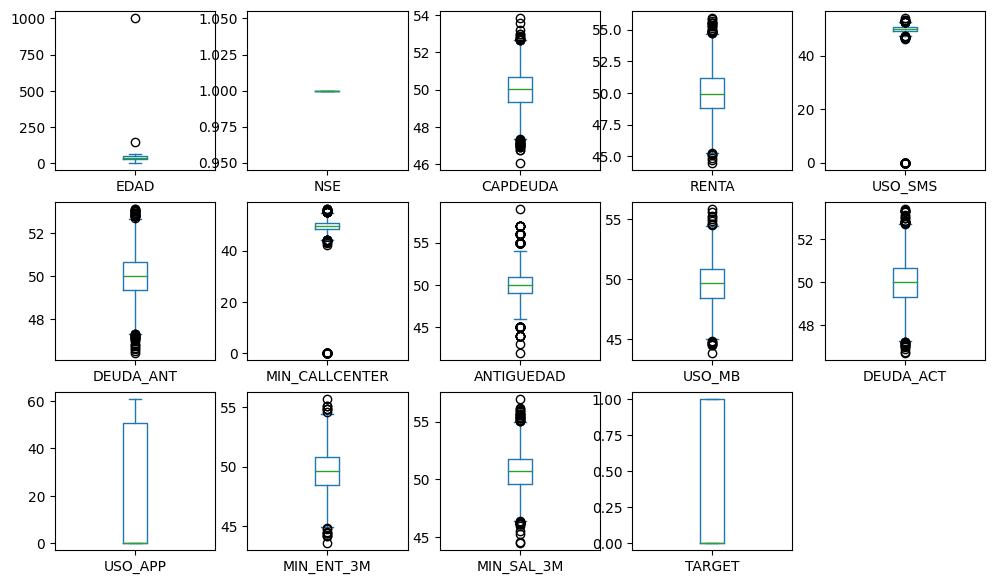

In [ ]:
# Mostramos boxplots de los features
import matplotlib.pyplot as plt
df.plot(kind='box', subplots=True, layout=(3,5), sharex=True, sharey=False,  figsize=[12,7])
plt.show()

In [ ]:
# Observamos que NSE  tiene  valor constante (1.0). Por tanto, no sirve como variable predictora
df = df.drop(columns = ['NSE'])

Podemos  corregir manualmente algunos outliers, usando el criterio de que usuarios no pueden ser menores de edad o mayores de 80

In [ ]:
# Observamos que EDAD tiene valores inconsistentes: no puedo tener clientes menores de 18 años. Tampoco existen personas de 999 años.

# A todos los que tienen menos de 18, les asignamos directamente 18 años de edad (mínimo legal)
df.loc[df.EDAD < 18, 'EDAD'] = 18

# Todo valor por encima de los 80 años se le colocará simplemente 80 (no se espera que sean muchos casos por el tamaño poblacional)
df.loc[df.EDAD > 80, 'EDAD'] = 80

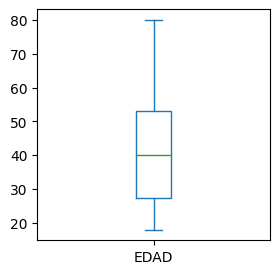

In [ ]:
# Verificamos
df.EDAD.plot(kind='box',figsize=[3,3])
plt.show()

Veamos la corrección de la columna CAPDEUDA usando los valores extremos del boxplot

In [ ]:
# Todo valor outlier se le asigna el menor/mayor valor no outlier
q1 = df.CAPDEUDA.quantile(0.25)
q3 = df.CAPDEUDA.quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5*iqr  #Encima del bigote
ll = q1 - 1.5*iqr  #Debajo del bigote
df.loc[df.CAPDEUDA>ul, 'CAPDEUDA'] = ul
df.loc[df.CAPDEUDA<ll, 'CAPDEUDA'] = ll

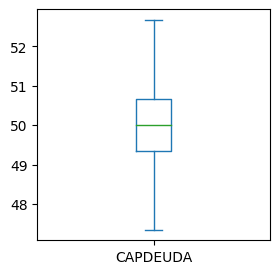

In [ ]:
# Verificamos
df.CAPDEUDA.plot(kind='box', figsize=[3,3])
plt.show()

Podemos definir una funcion para generalizar la correccion de outliers hecha en CAPDEUDA a cualquier columna numerica

In [ ]:
# Hacemos que los outliers sean reemplazados por el menor/mayor valor no outlier
# No se incluyen las variables USO_APP, USO_SMS o USO_MB ya que en ellas el 0 sí es un dato real
columnas_lst = ['RENTA', 'DEUDA_ANT', 'ANTIGUEDAD', 'DEUDA_ACT', 'MIN_ENT_3M', 'MIN_SAL_3M']

Cualquier valor, que esté más allá del rango de -1.5 x IQR a 1.5 x IQR es considerado outlier

In [ ]:
def corrige_outliers(dfx, columnas_lst):
  for columna in columnas_lst:
    q1 = dfx[columna].quantile(0.25)
    q3 = dfx[columna].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5*iqr # upper_limit
    ll = q1 - 1.5*iqr # lower_limit
    dfx.loc[dfx[columna]>ul, columna] = ul
    dfx.loc[dfx[columna]<ll, columna] = ll
  return dfx

In [ ]:
# aplica la funcion de corrección de outliers a las columnas numericas en columnas_lst
df = corrige_outliers(df, columnas_lst)

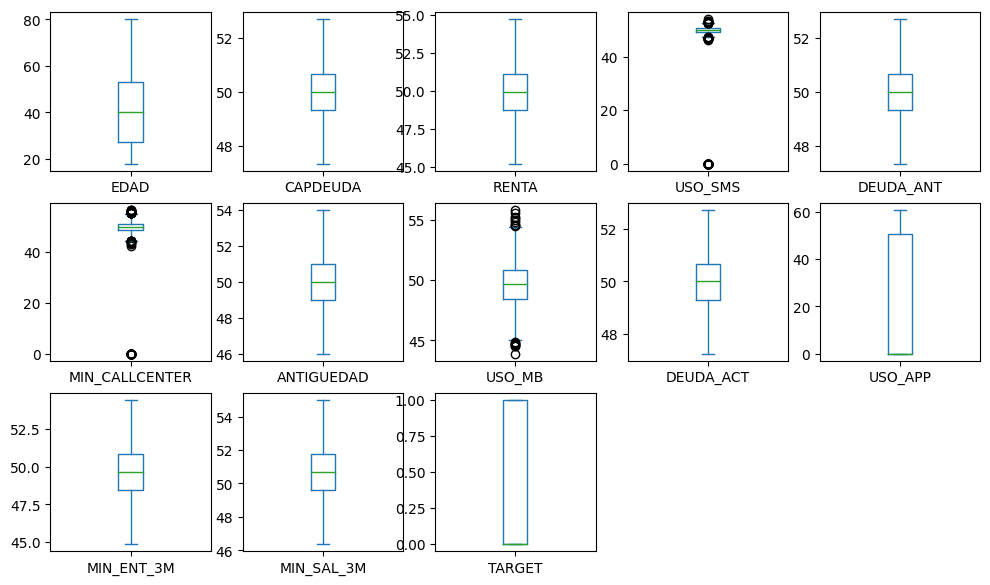

In [ ]:
# Verificamos
df.plot(kind='box', subplots=True, layout=(3,5), sharex=True, sharey=False,  figsize=[12,7])
plt.show()

In [ ]:
# Se observa que una alta proporción de USO_APP es 0. Chequeamos cuanto es esta proporcion
df.loc[df.USO_APP == 0].shape[0]/df.shape[0]

0.522134627046695

In [ ]:
# Vemos que más del 50% de la variable USO_APP es 0, dropeamos esta variable ya que es poco probable que contribuya en el modelo
df = df.drop(columns = 'USO_APP')

## Generando la variable TARGET (SEGUN EL ARTICULO ESTO ES AL ULTIMO)
Primero, revisamos la distribución de la variable target de predicción, en este caso, la columna CHURN

In [ ]:
df.CHURN.value_counts()

,count
CHURN,
1,1672
2,1668
0,1660


Como solo queremos predecir si el cliente se va a ir o no, transformamos la variable para que sea binaria. Asi, se simplifica el problema a clasificación binaria. Creamos un nuevo atributo 'TARGET' y asignamos el valor 1 si el cliente se fué (valor 0 en la columna CHURN) y valor 0 si el cliente no se fue (valores 1 o 2 en CHURN).

In [ ]:
import numpy as np

# Función np.where(<condicion>, <valor cierto>, <valor falso>)
df['TARGET'] = np.where(df['CHURN']==0, 1, 0)

# Revisamos cómo queda la variable
df.TARGET.value_counts()

,count
TARGET,
0,3340
1,1660


In [ ]:
# Eliminamos la variable original ya que no la usaremos. Usaremos el TARGET
df = df.drop(columns = ['CHURN'])

In [ ]:
# Revisamos cómo queda el balance de las clases (en porcentajes)
(df.TARGET.value_counts()/df.shape[0])*100

,count
TARGET,
0,66.8
1,33.2


En este caso, se puede observar que existe un desbalance entre las clases (66% vs 33%). Este desbalance no es muy fuerte.

## Entendiendo Correlaciones entre Features
Revisamos correlaciones entre variables numéricas

In [ ]:
pd.set_option('display.precision', 2)  # setea la cantidad de decimales a mostrar en lo sucesivo en los dataframes

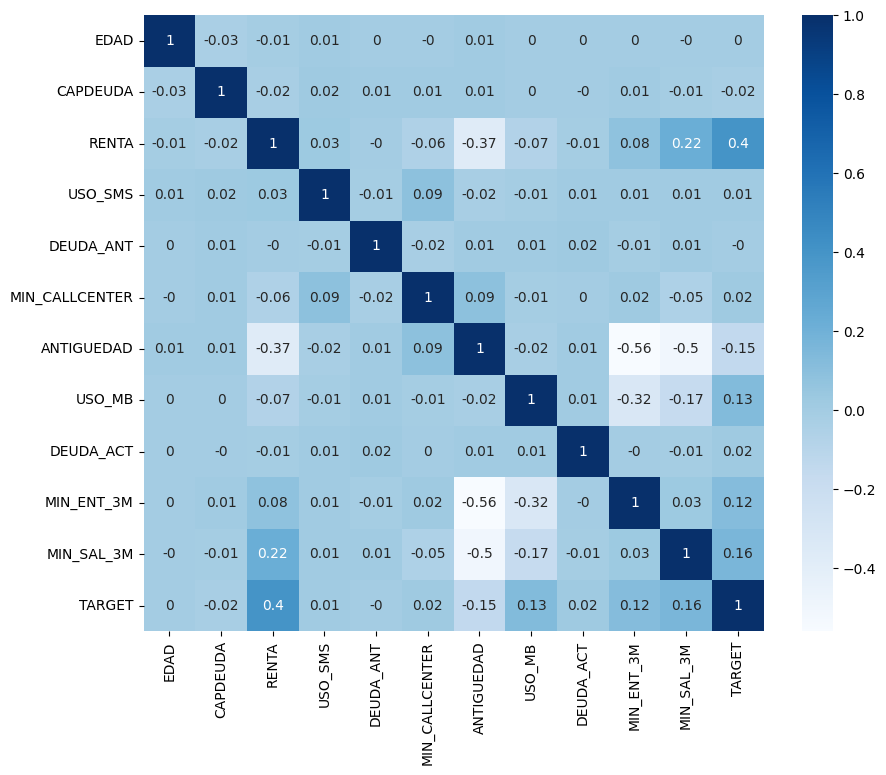

In [ ]:
import seaborn as sns

df_corr = df.corr(numeric_only=True).apply(lambda x: round(x,2))
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,
            annot=True,
            cmap='Blues')
plt.show()

Dado que no hay correlaciones fuertes, no eliminamos ninguna variable, ya que no hay redundancia entre ellas

## Codificamos las variables categoricas a numericas para su uso en ML

In [ ]:
# veamos los diferentes valores del feature DEPARTAMENTO
df.DEPARTAMENTO.value_counts()

,count
DEPARTAMENTO,
LIMA,1129
AREQUIPA,481
PASCO,480
CUSCO,478
AYACUCHO,319
TACNA,319
ICA,319
JUNIN,319
PUNO,160


In [ ]:
# Creamos 4 variables binarias (Norte, Sur, Centro y Lima) en base a la ubicacion del DEPARTAMENTO.
# Esta codificacion se llama one-hot encoding y es util para convertir categorias en valores numericos
df['LIMA'] = np.where(df.DEPARTAMENTO == 'LIMA', 1, 0)
df['SUR'] = np.where(df.DEPARTAMENTO.isin(['AREQUIPA', 'CUSCO', 'ICA', 'AYACUCHO', 'TACNA', 'MOQUEGUA', 'PUNO']), 1, 0)
df['CENTRO'] = np.where(df.DEPARTAMENTO.isin(['PASCO', 'JUNIN', 'UCAYALI']), 1, 0)
df['NORTE'] = np.where(df.DEPARTAMENTO.isin(['LA LIBERTAD', 'LORETO', 'PIURA', 'ANCASH']), 1, 0)

In [ ]:
# Borramos el feature DEPARTAMENTO, ya que solo se usará las variables binarias que acabamos de codificar
df = df.drop(columns = 'DEPARTAMENTO')

**Nota importante**: en este caso, esta forma de codificacion  resulta igual que usando dummies (One-hot encoding). El procedimiento es adecuado debido a que no hay una relación de orden entre los elementos. Si se hubiese usado "cat.codes" o "LabelEncoder()", los resultados en algunos algoritmos de ML (como los que dependen de distancias) podrian ser erróneos.

In [ ]:
df.sample(5)

,GENERO,EDAD,CAPDEUDA,RENTA,USO_SMS,DEUDA_ANT,MIN_CALLCENTER,ANTIGUEDAD,USO_MB,DEUDA_ACT,MIN_ENT_3M,MIN_SAL_3M,TARGET,LIMA,SUR,CENTRO,NORTE
CLIENT_ID,,,,,,,,,,,,,,,,,
2191,F,44,48.75,49.94,50.39,50.06,49.20,48.0,51.93,51.51,48.78,52.34,0,0,1,0,0
1095,M,52,50.26,50.39,47.83,50.06,47.13,48.0,51.65,49.99,48.25,52.19,0,0,1,0,0
3994,M,56,51.39,51.52,49.70,50.50,49.34,49.0,48.93,50.14,54.20,47.15,1,0,0,1,0
185,M,43,48.17,48.59,50.99,50.01,50.69,51.0,50.69,49.80,48.77,49.01,0,0,0,1,0
2482,F,42,50.18,48.49,50.35,51.53,47.36,51.0,50.96,50.60,47.45,49.94,0,1,0,0,0



Si bien el encoding se puede hacer manualmente, scikit-learn provee de un conjunto de Encoders que facilitan la tarea
```
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder().fit(df['DEPARTAMENTO'])
df['DEPARTAMENTO'] = label_encoder.transform(df['DEPARTAMENTO'])
```
Este codigo hubiera un codigo numerico a cada categoria distinta en DEPARTAMENTO (entre 0 a #categorias-1). No es recomendable esta codificacion ya que no hay una relacion de orden entre las categorias. (Mejor one-hot encoding)

También se puede usar "cat.codes" pero transforma valores categoricos a numéricos en orden alfabetico descendiente

```
df['DEPARTAMENTO'].cat.codes
```




In [ ]:
# Chequeamos si hay mas variables categoricas que necesitemos codificar a numericas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4947 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENERO          4947 non-null   object 
 1   EDAD            4947 non-null   int64  
 2   DEPARTAMENTO    4947 non-null   object 
 3   CAPDEUDA        4947 non-null   float64
 4   RENTA           4947 non-null   float64
 5   USO_SMS         4947 non-null   float64
 6   DEUDA_ANT       4947 non-null   float64
 7   MIN_CALLCENTER  4947 non-null   float64
 8   ANTIGUEDAD      4947 non-null   float64
 9   USO_MB          4947 non-null   float64
 10  DEUDA_ACT       4947 non-null   float64
 11  MIN_ENT_3M      4947 non-null   float64
 12  MIN_SAL_3M      4947 non-null   float64
 13  TARGET          4947 non-null   int64  
 14  LIMA            4947 non-null   int64  
 15  SUR             4947 non-null   int64  
 16  CENTRO          4947 non-null   int64  
 17  NORTE           4947 non-null   int64 

La variable GENERO es de tipo object, presumiblemente almacena categorias

In [ ]:
# Analicemos que categorias tiene la variable GENERO
df.GENERO.value_counts()

,count
GENERO,
F,2475
M,2472


In [ ]:
# Podemos binarizar GENERO usando dummies (One-hot encoding)
# Como son 3 categorias de Genereo, se crearán 3 features one-hot
df = pd.get_dummies(df, columns = ['GENERO'])

In [ ]:
df.sample(10)

,EDAD,DEPARTAMENTO,CAPDEUDA,RENTA,USO_SMS,DEUDA_ANT,MIN_CALLCENTER,ANTIGUEDAD,USO_MB,DEUDA_ACT,MIN_ENT_3M,MIN_SAL_3M,TARGET,LIMA,SUR,CENTRO,NORTE,GENERO_F,GENERO_M
CLIENT_ID,,,,,,,,,,,,,,,,,,,
4039,54,CUSCO,47.77,49.04,51.07,50.86,50.34,52.0,50.50,50.05,47.63,48.35,0,0,1,0,0,True,False
4550,32,ICA,50.67,51.03,49.11,49.43,50.42,50.0,48.97,51.03,50.29,51.54,1,0,1,0,0,False,True
4098,26,LIMA,50.01,49.99,50.10,50.42,51.63,51.0,53.03,50.07,49.94,50.35,0,1,0,0,0,False,True
490,18,TACNA,49.68,49.45,51.89,48.41,46.98,49.0,48.91,48.69,51.05,50.50,0,0,1,0,0,False,True
3388,22,CUSCO,49.15,50.95,50.70,50.87,49.68,54.0,51.00,52.53,47.97,49.49,1,0,1,0,0,False,True
4765,31,AYACUCHO,50.06,51.10,48.09,50.39,51.94,48.0,50.73,49.75,50.65,52.61,1,0,1,0,0,True,False
3830,50,ANCASH,47.34,50.05,50.77,50.09,49.13,48.0,47.05,50.27,53.12,51.02,1,0,0,0,1,True,False
1088,20,LIMA,50.85,53.25,52.06,50.77,49.04,50.0,48.15,50.95,49.84,49.84,1,1,0,0,0,False,True
1586,18,LIMA,51.62,49.26,52.47,50.76,51.84,48.0,52.69,51.89,48.63,53.14,1,1,0,0,0,False,True


In [ ]:
#dropeamos alguna de las 2 columnas 'GENERO_M' o GENERP_M, ya que contienen la misma informacion
df = df.drop(columns = ['GENERO_M'])

In [ ]:
# Finalmente, chequeamos que todas las variables sean numericas
df.dtypes

,0
EDAD,int64
DEPARTAMENTO,object
CAPDEUDA,float64
RENTA,float64
USO_SMS,float64
DEUDA_ANT,float64
MIN_CALLCENTER,float64
ANTIGUEDAD,float64
USO_MB,float64
DEUDA_ACT,float64


In [ ]:
# Salvamos la data procesada en un archivo, la cual esta lista para ser usada por algoritmos de ML
df.to_excel('DatosProcesados.xlsx')